In [79]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [44]:
#setting plotting defaults

default = {'font.size': 15,
          'figure.figsize': (10, 6)}
plt.rcParams.update(default) 

## 3.1 Checking the data


In [168]:
# First plotting the histogram of the datra

#data_oe stores the experimental data with oscillation
data_oe = np.loadtxt('data1.txt', skiprows = 2, max_rows = 200) # 200 data points


#data_us stores the unoscillated simulated data
data_us = np.loadtxt('data1.txt', skiprows = 205, max_rows = 200)


#e_list is the coreesponding energy level of the data
e_list = np.linspace(0.025,9.975,200)


Text(0.5, 1.0, 'histogram of muons at different energy levels')

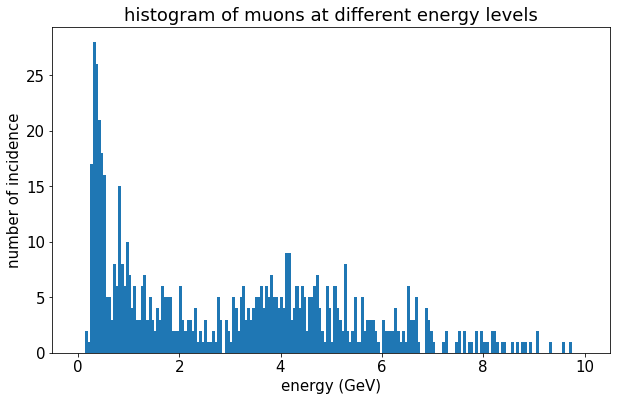

In [169]:
#plotting
plt.bar(e_list,data_oe, width = .06)
plt.xlabel('energy (GeV)')
plt.ylabel('number of incidence')
plt.title('histogram of muons at different energy levels')

# 3.2 Writing the PDF function and showing rudimentary fit using unosci_simulated data

In [170]:
# Coding the prob density function P

#m_23_2 denotes the difference of square mass difference
def pdf(E, L, theta_23, m_23_2):
    #val = 1 - (np.sin(2 * theta_23))**2 * (np.sin(1.267 * m_23_2 * L / E))**2
    x1 = np.sin(2 * theta_23)
    x2 = np.sin(1.267 * m_23_2 * L / E)
    val = 1 - x1*x1 * x2*x2
    return val

Text(0.5, 1.0, 'the PDF p(E), equation 1')

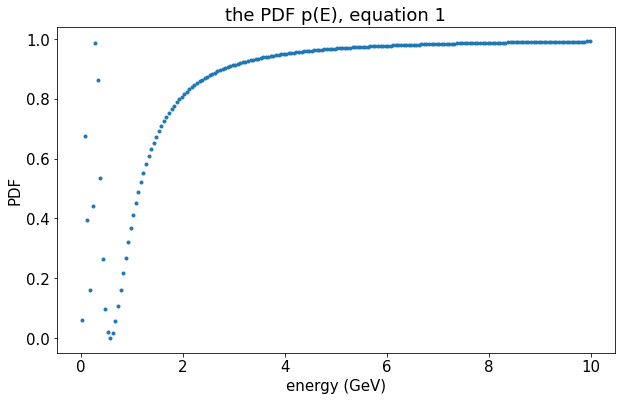

In [171]:
# Testing the funtion with some energy E

#using given values of parameters
theta_23 = np.pi / 4
m_23_2 = 2.4e-3
L = 295
eV = 1.6e-19

e_list = np.linspace(00.025,9.975,200)
prob_e = pdf(e_list, L = L, theta_23 = theta_23, m_23_2 = m_23_2)
plt.plot(e_list, prob_e,'.')
plt.xlabel('energy (GeV)')
plt.ylabel('PDF')
plt.title('the PDF p(E), equation 1')

Text(0.5, 1.0, 'unosci_simu data vs. energy')

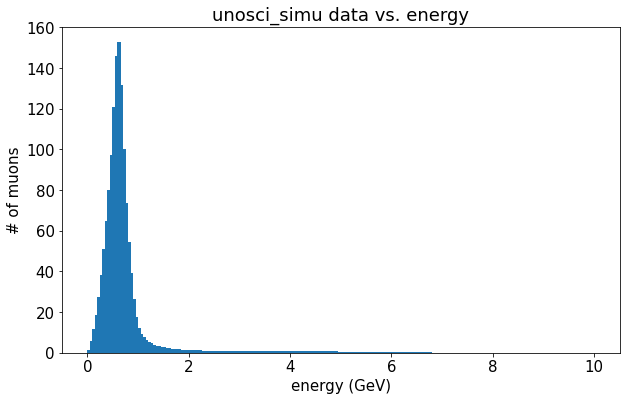

In [172]:
# plot the unoscillatory simulated data
plt.bar(e_list,data_us, width = .06)
plt.xlabel('energy (GeV)')
plt.ylabel('# of muons')
plt.title('unosci_simu data vs. energy')

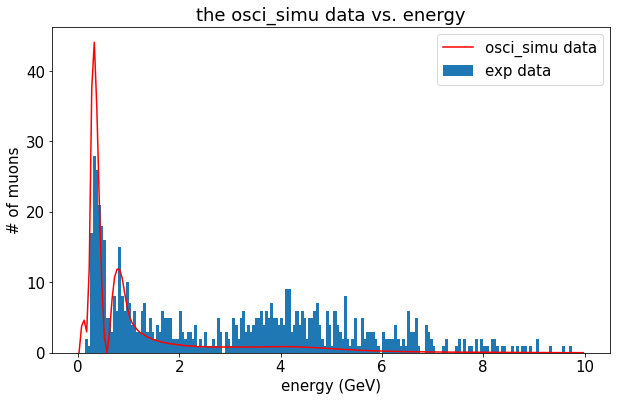

In [173]:
#combine the PDF with the unosci_simudata
data_os = prob_e * data_us
plt.plot(e_list,data_os, 'r-', label = 'osci_simu data')
plt.xlabel('energy (GeV)')
plt.ylabel('# of muons')
plt.title('the osci_simu data vs. energy')

#adding the real data for comparison
plt.bar(e_list,data_oe, width = .06, label = 'exp data')

plt.legend()

# Writing the NLL

In [174]:
m = data_oe

theta_23 = np.pi / 4
m_23_2 = 2.4e-3
L = 295


e_list = np.linspace(0.025,9.975,200)

# The lambda func
# calculating expected osci_simu data at each energy interval
# u:the parameters to fit
# var_fit : tell the function to intake which variable 
def lamb(u, var_fit):
    '''
    This function takes in parameters and output the corresponding ocsi_simu data(expected values)
    '''
    if var_fit == 'theta_23':
        PDF = pdf(theta_23 = u, E = e_list, L = L,  m_23_2 = m_23_2 )
        osci_simu = PDF * data_us
        #PDF = lambda theta_23: pdf(theta_23, E = e_list, L = L,  m_23_2 = m_23_2) * data_us
        # osci_simu = PDF * data_us
        return osci_simu
    else: 
        raise('please input correct variable name')
    




# the NLL function
# did not include the factorial term
def NLL(u, m, var_fit):   # u is the parameters for minimisation, m is the experimental data
    '''
    the negative log likihood function
    takes in vector of parameters, the experimental values and the names of variables to fit
    returns the negative log likelihood
    '''
    val = sum( lamb(u, 'theta_23') - m * np.log(lamb(u, 'theta_23')) )
    return val







In [175]:
NLL(theta_23, m, 'theta_23')


68.58106590641816

Text(0.5, 0, '\\theta_{23}')

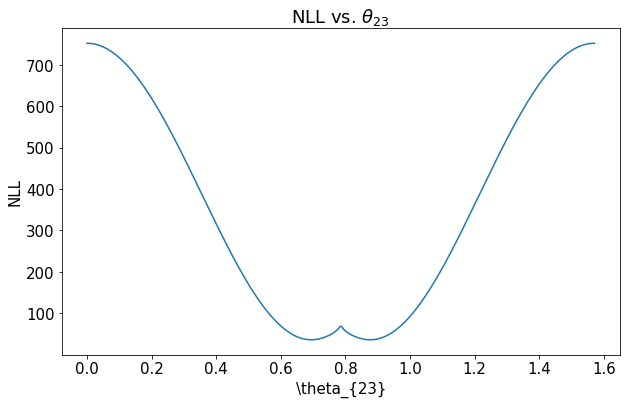

In [185]:
# plotting NLL to spot the approximate minimum
t_list = np.linspace(0,np.pi/2,10000)
NLL_list = []
for i in range(10000):
    NLL_list.append(NLL(t_list[i], m, 'theta_23'))
plt.plot(t_list, NLL_list)
plt.title(r"NLL vs. $\theta_{23}$")
plt.ylabel('NLL')
plt.xlabel(r'\theta_{23}')

In [178]:
minimize(lambda u: NLL(u, m, 'theta_23'), theta_23)

      fun: 36.142825515496746
 hess_inv: array([[0.00013617]])
      jac: array([9.05990601e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 3
     njev: 12
   status: 0
  success: True
        x: array([0.8765342])

In [179]:
from scipy.optimize import minimize